# 数字图像处理实验3

实验要求:

- 将wukong.jpg中的内容，通过几何变换贴到board1.jpg和board2.jpg中的某张海报墙上

- 自己选一张图片，重复如上操作

- 要求编程实现，而不是手工处理


实现思路：

    手动找出海报墙四个点的坐标，以此截取ROI，运用透视变换转化图像，最后仿照上次实验的方法拼合在一起

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
board = cv2.imread("board2.jpg")
wukong = cv2.imread("wukong.jpg")

In [3]:
pts = np.array([[1942,1065],[1961,1794],[2705,1794],[2677,927]],dtype=np.int32)

x:1942 y:927 h:1794 w:2705


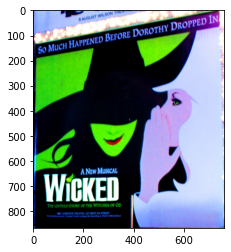

In [4]:
x,y = np.amin(pts,axis=0)
w,h = np.amax(pts,axis=0)
print(f"x:{x} y:{y} h:{h} w:{w}")
roi = board[y:h,x:w]
plt.imshow(roi[:,:,::-1])

(867, 763) 763 867 (450, 607)
(867, 763)


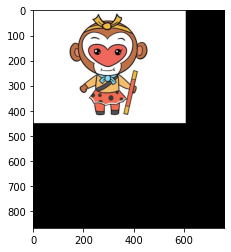

In [5]:
print(roi.shape[:2],w-x,h-y,wukong.shape[:2])
canvas = np.zeros((h-y,w-x,3), np.uint8)
rows, cols = wukong.shape[:2]
canvas[0:rows,0:cols]=wukong
print(canvas.shape[:2])
plt.imshow(canvas[:,:,::-1])

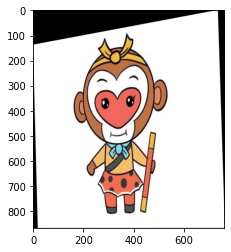

In [6]:
pts1 = np.float32([[0, 0], [0,rows],[cols,rows], [cols, 0]])
pts2 = np.float32((pts-np.array([x,y])))
M = cv2.getPerspectiveTransform(pts1, pts2)
# print(M)
ft = cv2.warpPerspective(canvas, M,(w-x,h-y))
plt.imshow(ft[:,:,::-1])

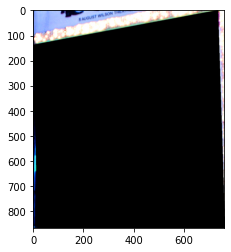

In [7]:
cv2.fillPoly(roi, [np.int32(pts2.reshape((-1,1,2)))], (0,0,0))
plt.imshow(roi[:,:,::-1])

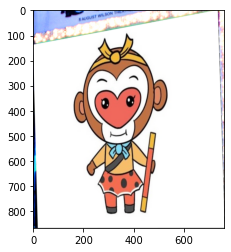

In [8]:
res = cv2.add(roi,ft)
plt.imshow(res[:,:,::-1])

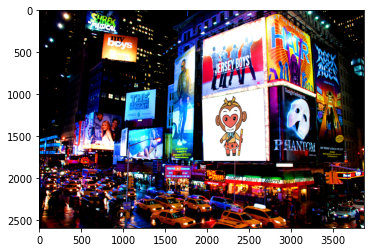

In [9]:
board[y:h,x:w] = res
plt.imshow(board[:,:,::-1])

**重复**

吃我封装了，哈哈哈哈哈！！！

In [27]:
def 一键缝合(pts,src,dst):
    '''
    pts:输入四个点坐标
    src:源图片
    dst:要贴上去的图片
    '''
    x,y = np.amin(pts,axis=0)
    w,h = np.amax(pts,axis=0)
    roi = src[y:h,x:w]
    canvas = np.zeros((h-y,w-x,3), np.uint8)
    rows, cols = dst.shape[:2]
    if rows>roi.shape[0] or cols>roi.shape[1]:
        dst = cv2.resize(dst,(int(roi.shape[1]/2),int(roi.shape[0]/2)))
        rows, cols = dst.shape[:2]
    canvas[0:rows,0:cols]=dst
    pts1 = np.float32([[0, 0], [0,rows],[cols,rows], [cols, 0]])
    pts2 = np.float32((pts-np.array([x,y])))
    M = cv2.getPerspectiveTransform(pts1, pts2)
    ft = cv2.warpPerspective(canvas, M, (w-x,h-y))
    cv2.fillPoly(roi, [np.int32(pts2.reshape((-1,1,2)))], (0,0,0))
    roi = cv2.add(roi,ft)
    src[y:h,x:w] = roi
    return src

pre: 450 607


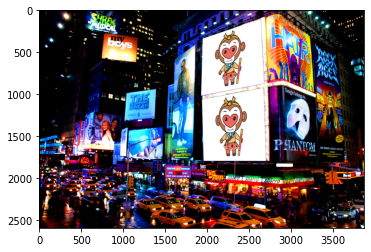

In [28]:
ptsa = np.array([[1951,340],[1932,1018],[2683,873],[2642,107]],dtype=np.int32)
一键缝合(ptsa,board,wukong)
plt.imshow(board[:,:,::-1])

pre: 450 607
too large: 679 142


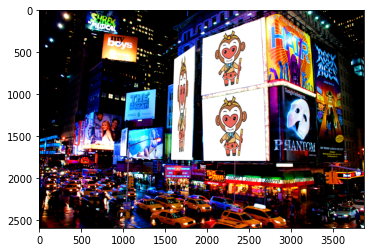

In [29]:
ptsb = np.array([[1611,586],[1573,1781],[1825,1784],[1857,425]],dtype=np.int32)
一键缝合(ptsb,board,wukong)
plt.imshow(board[:,:,::-1])

pre: 450 607
too large: 187 187


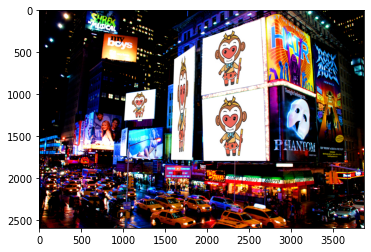

In [30]:
ptsc = np.array([[1037,993],[1015,1314],[1371,1292],[1390,939]],dtype=np.int32)
一键缝合(ptsc,board,wukong)
plt.imshow(board[:,:,::-1])

pre: 450 607
too large: 172 216


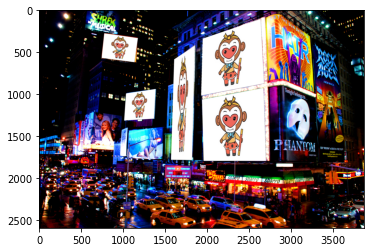

In [31]:
ptsd = np.array([[778,277],[747,570],[1138,621],[1179,334]],dtype=np.int32)
一键缝合(ptsd,board,wukong)
plt.imshow(board[:,:,::-1])

pre: 450 607
too large: 182 209


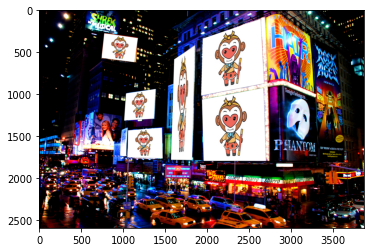

In [32]:
ptse = np.array([[1062,1431],[1056,1750],[1475,1765],[1466,1400]],dtype=np.int32)
一键缝合(ptse,board,wukong)
plt.imshow(board[:,:,::-1])

pre: 450 607
too large: 742 192


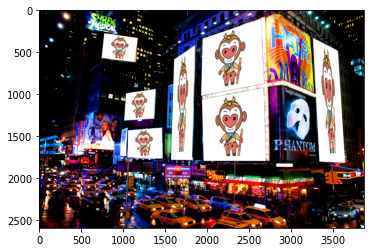

In [33]:
ptsf = np.array([[3263,331],[3342,1803],[3648,1816],[3563,485]],dtype=np.int32)
一键缝合(ptsf,board,wukong)
plt.imshow(board[:,:,::-1])

In [34]:
cv2.imwrite("result_final.png",board)

True